In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
# %matplotlib inline
import csv

from sklearn.datasets import load_boston

In [2]:
# Initializing the data
csv_file = open(r"C:\Users\malon\OneDrive\Desktop\data.csv")
rows = csv.reader(csv_file)
rows = list(rows)
data = pd.DataFrame(rows[1:]).astype(float)


In [3]:
# preprocessing and check the data
print(data.shape)
data.columns = rows[0]
data = data.drop('id', axis=1)
data = data.drop('TtlPrc', axis=1)
data = data.rename(columns={"UntPrc": "Price"})

use_property_only = 0
remove_a, remove_t, remove_e = 0,0,0
if use_property_only:
    data = data.drop(['TspNum','TspDst', 'AtrNum','AtrDst','EdcNum','EdcDst','HthNum',
                      'HthDst','RstNum','RstDst','RtlNum','RtlDst','TrfV',
                      'AgrPct','DstPct','HppPct','SadPct','FeaPct'], axis=1)
else:
    if remove_a:
        data = data.drop(['TspNum', 'TspDst', 'AtrNum', 'AtrDst', 'EdcNum', 'EdcDst', 'HthNum',
                          'HthDst', 'RstNum', 'RstDst', 'RtlNum', 'RtlDst'], axis=1)
    if remove_t:
        data = data.drop(['TrfV'], axis=1)
    if remove_e:
        data = data.drop(['AgrPct', 'DstPct', 'HppPct', 'SadPct', 'FeaPct'], axis=1)


print(data.head())
print(data.dtypes)
print(data.isnull().sum())

(28550, 29)
     Price    Year  Elvt  RmNum  HllNum  KchNum  BthNum        Lat  \
0  82533.0  2010.0   1.0    4.0     1.0     1.0     3.0  40.006694   
1  67659.0  1999.0   1.0    3.0     2.0     0.0     2.0  39.979226   
2  67205.0  2007.0   1.0    4.0     2.0     1.0     2.0  39.973845   
3  74996.0  1985.0   0.0    2.0     1.0     1.0     1.0  39.962995   
4  32682.0  2003.0   1.0    3.0     2.0     1.0     2.0  39.943112   

          Lng  TspNum  ...  RstNum  RstDst  RtlNum  RtlDst       TrfV  AgrPct  \
0  116.486687    39.0  ...   100.0   150.0    55.0   279.0   0.000000    13.0   
1  116.314551    44.0  ...   100.0   208.0    52.0   397.0  23.570463    11.0   
2  116.463587    30.0  ...   100.0   238.0    38.0   446.0  41.096296    16.0   
3  116.449455    50.0  ...   100.0   187.0    41.0   357.0  36.396620    12.0   
4  116.109599    48.0  ...    88.0   180.0    32.0   478.0   0.000000    11.0   

   DstPct  HppPct  SadPct  FeaPct  
0     7.0    33.0    20.0    24.0  
1    10.

In [4]:
# Viewing the data statistics
print(data.describe())

               Price          Year          Elvt         RmNum        HllNum  \
count   28550.000000  28550.000000  28550.000000  28550.000000  28550.000000   
mean    66056.070193   2001.004658      0.605464      2.229877      1.160140   
std     25573.083814      9.024089      0.488759      0.870877      0.542232   
min     13209.000000   1950.000000      0.000000      0.000000      0.000000   
25%     45760.000000   1996.000000      0.000000      2.000000      1.000000   
50%     61924.500000   2003.000000      1.000000      2.000000      1.000000   
75%     81598.000000   2007.000000      1.000000      3.000000      1.000000   
max    159975.000000   2017.000000      1.000000      9.000000      5.000000   

             KchNum        BthNum           Lat           Lng        TspNum  \
count  28550.000000  28550.000000  28550.000000  28550.000000  28550.000000   
mean       0.969457      1.312469     39.944652    116.396642     37.291349   
std        0.197303      0.572143      0.1

In [5]:
# Finding out the correlation between the features
corr = data.corr()
print(corr.shape)


(27, 27)


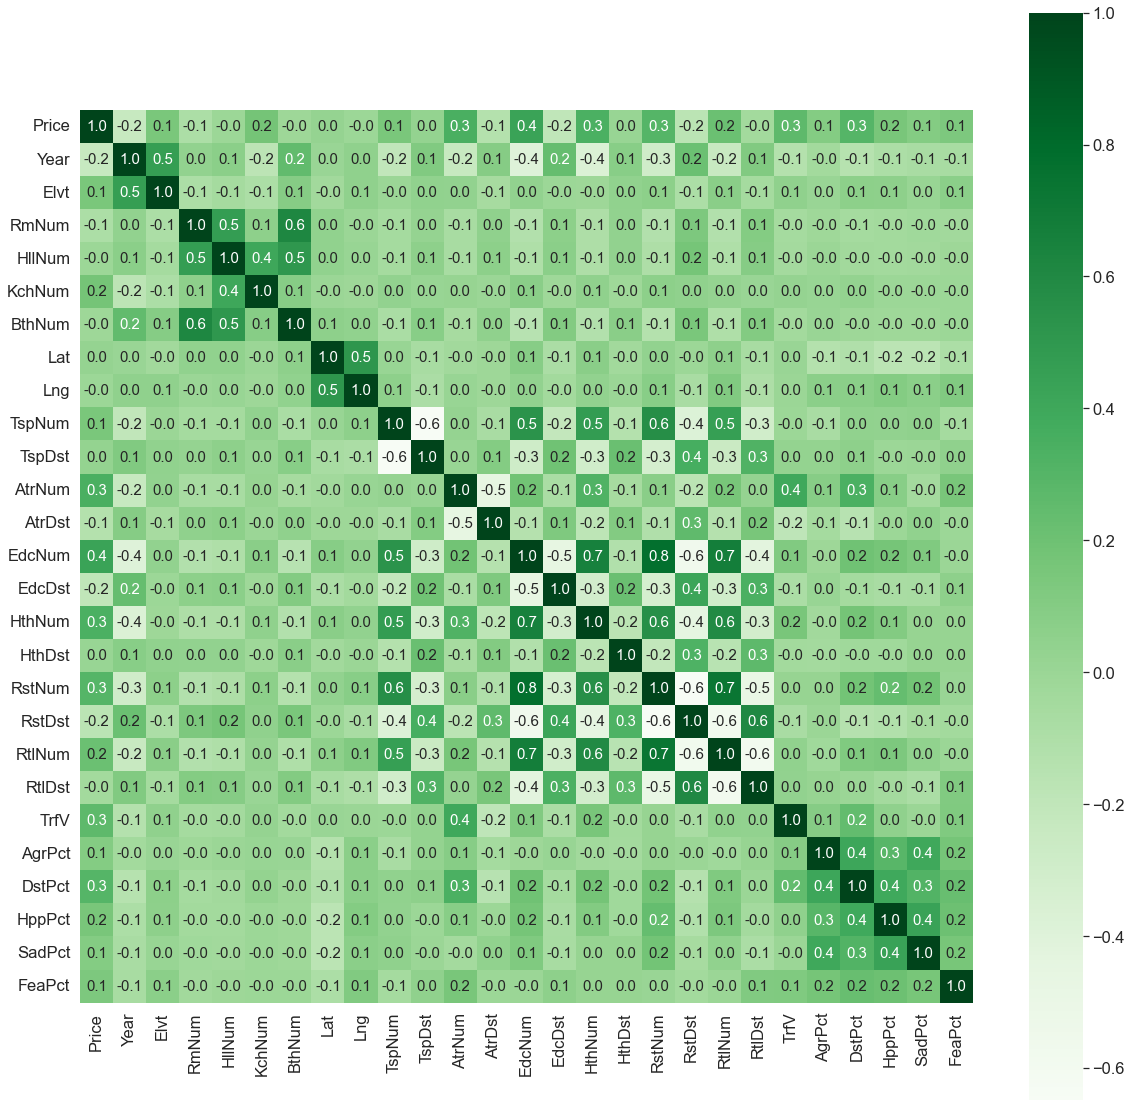

In [6]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [7]:
# Spliting target variable and independent variables
X = data.drop(['Price'], axis = 1)
y = data['Price']


In [8]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [9]:
print('------------Linear Regression-----------------')
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Value of y intercept
print(lm.intercept_)

#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
print(coeffcients)

# Model prediction on train data
y_pred = lm.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

------------Linear Regression-----------------
548013.5557669788
   Attribute  Coefficients
0       Year    -225.75364
1       Elvt   8321.198579
2      RmNum   -2341.10337
3     HllNum  -1195.103358
4     KchNum  16563.598136
5     BthNum   4251.968082
6        Lat  10408.041533
7        Lng  -4548.266303
8     TspNum     28.062999
9     TspDst     25.225605
10    AtrNum    307.328478
11    AtrDst      3.917261
12    EdcNum    316.915286
13    EdcDst    -10.458641
14    HthNum    150.618326
15    HthDst      6.581001
16    RstNum     109.19536
17    RstDst     15.602656
18    RtlNum   -236.628797
19    RtlDst      4.772687
20      TrfV    157.894182
21    AgrPct    194.200055
22    DstPct    860.432803
23    HppPct      33.10326
24    SadPct     35.233391
25    FeaPct     212.39968
R^2: 0.3797062656877809
Adjusted R^2: 0.37889818686765275
MAE: 15390.863827220806
MSE: 411032380.9335489
RMSE: 20273.933533815012


In [10]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
mae_linreg = metrics.mean_absolute_error(y_test, y_test_pred)
rmse_linreg = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mae_linreg)
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',rmse_linreg)

R^2: 0.36510579665868503
Adjusted R^2: 0.36317241070332384
MAE: 15235.03039748839
MSE: 402302483.77281094
RMSE: 20057.479497005872


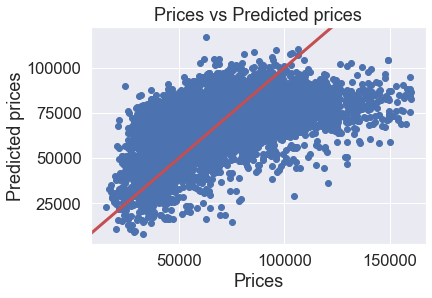

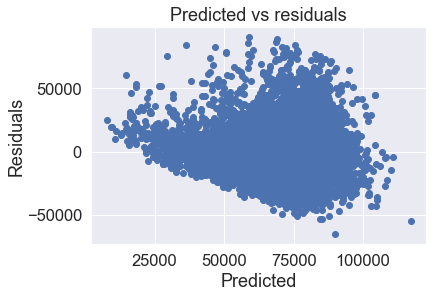

C:\Users\malon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


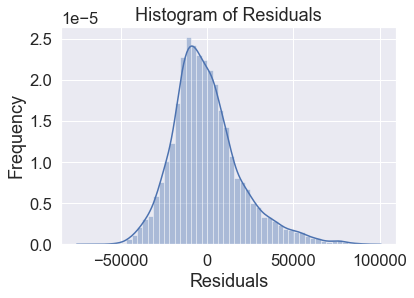

In [11]:
# Visualizing the differences between actual prices and predicted values
plt.clf()
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices", labelpad=1.5)
plt.title("Prices vs Predicted prices")
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='r', lw=3, scalex=False, scaley=False)
plt.show()

# Checking residuals
plt.clf()
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals", labelpad=1.5)
plt.show()

# Checking Normality of errors
plt.clf()
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [12]:
print('------------XGBoost Regressor-----------------')
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Model prediction on train data
y_pred = reg.predict(X_train)

------------XGBoost Regressor-----------------


In [13]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9342791622108163
Adjusted R^2: 0.9341935453262328
MAE: 4386.840846552884
MSE: 43549355.634533614
RMSE: 6599.193559408121


In [14]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)


In [15]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
mae_xgb = metrics.mean_absolute_error(y_test, y_test_pred)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mae_xgb)
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',rmse_xgb)

R^2: 0.8769732177282089
Adjusted R^2: 0.8765985753835068
MAE: 5721.253335704903
MSE: 77956263.92246445
RMSE: 8829.284451328116


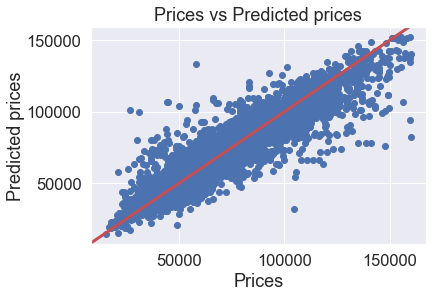

In [16]:
# Visualizing the differences between actual prices and predicted values
plt.clf()
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices", labelpad=1.5)
plt.title("Prices vs Predicted prices")
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='r', lw=3, scalex=False, scaley=False)

plt.show()

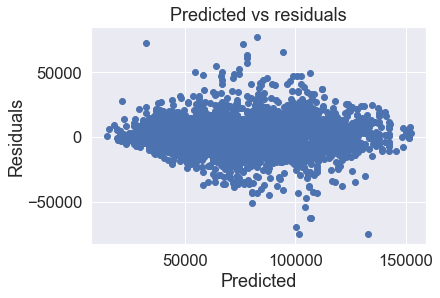

In [17]:
# Checking residuals
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals", labelpad=1.5)
plt.show()

C:\Users\malon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


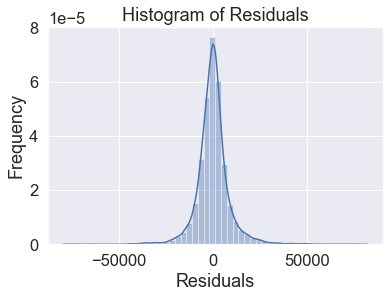

In [18]:
# Checking Normality of errors
plt.clf()
sns.distplot(y_test-y_test_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

<Figure size 432x288 with 0 Axes>

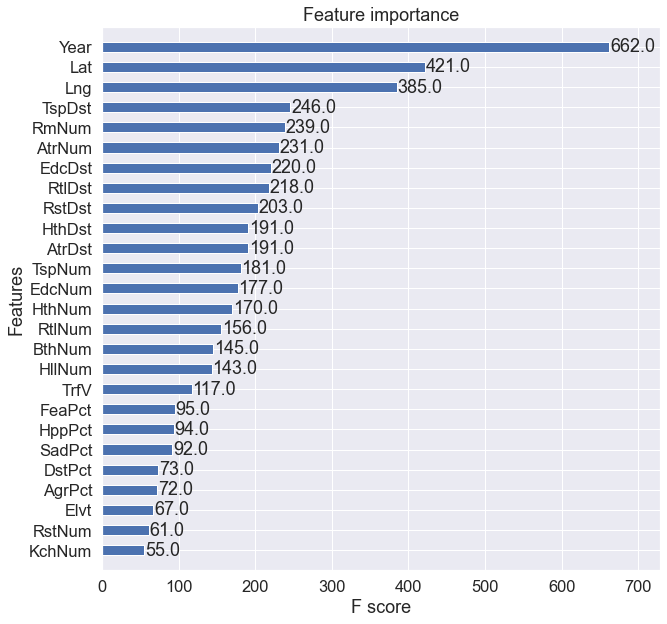

In [19]:
from xgboost import plot_importance
plt.clf()
fig,ax = plt.subplots(figsize=(10,10))
plot_importance(reg,height=0.5,max_num_features=64,ax=ax)
plt.show()